In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Machine Learning

In [72]:
#Read the Upsampled data and Downsampled data as CSV Files
df_up = pd.read_csv("df_up.csv")
df_down = pd.read_csv("df_down.csv")

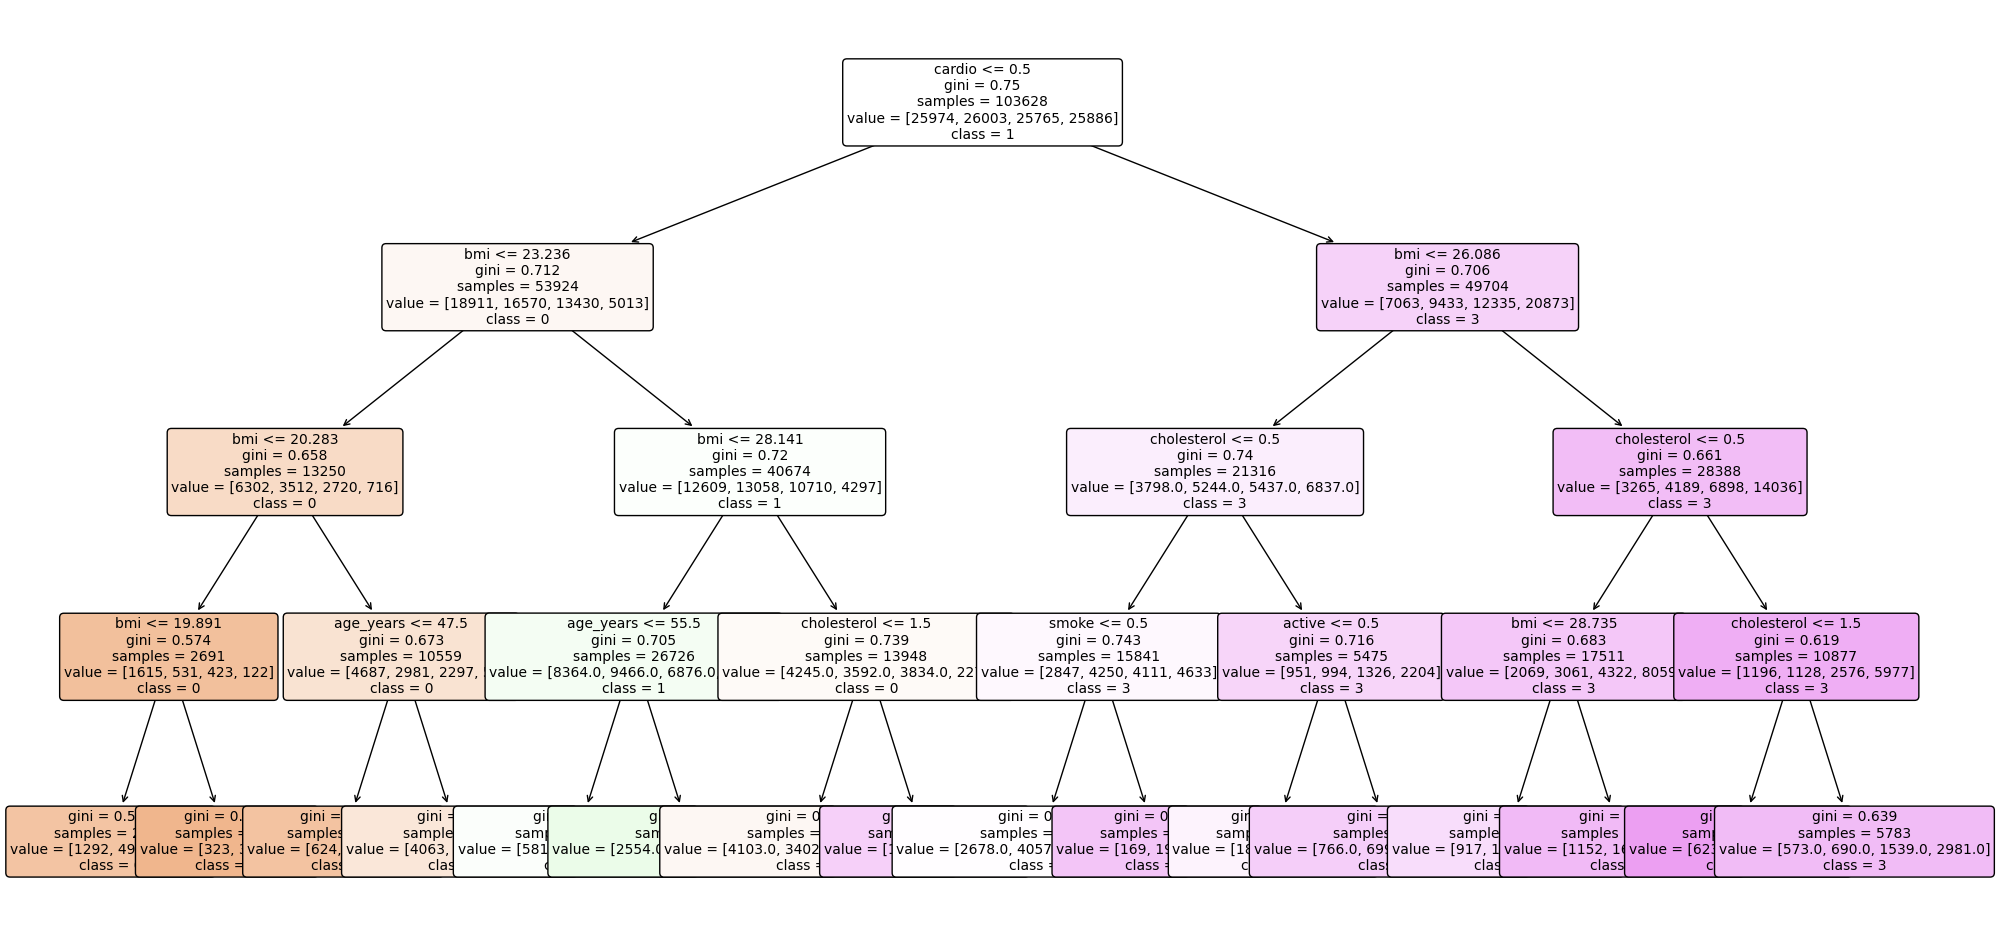

In [73]:
y = pd.DataFrame(df_up['bp_category'])
X = pd.DataFrame(df_up.drop('bp_category', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=X_train.columns,
          class_names=["0", "1", "2", "3"], fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

Train Data
Accuracy  :	 0.39783649206778093



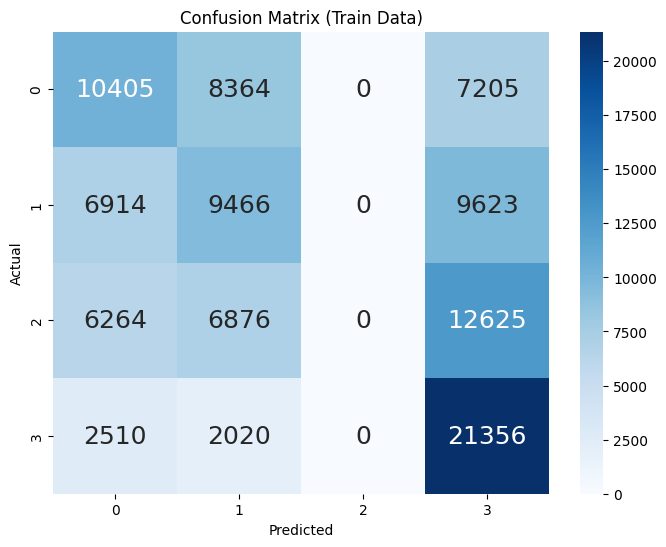

In [74]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cm_Train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

In [75]:
TP = np.diag(cm_Train)
FP = np.sum(cm_Train, axis=0) - TP
FN = np.sum(cm_Train, axis=1) - TP
TN = np.sum(np.sum(cm_Train)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.4005929005929006, TNR: 0.797975635511371, FPR: 0.20202436448862904, FNR: 0.5994070994070994
Class 1:
TPR: 0.36403491904780216, TNR: 0.7776489533011273, FPR: 0.2223510466988728, FNR: 0.6359650809521978
Class 2:
TPR: 0.0, TNR: 1.0, FPR: 0.0, FNR: 1.0
Class 3:
TPR: 0.8250019315460094, TNR: 0.621144297805562, FPR: 0.37885570219443804, FNR: 0.17499806845399057


Test Data
Accuracy  :	 0.3915006947660954



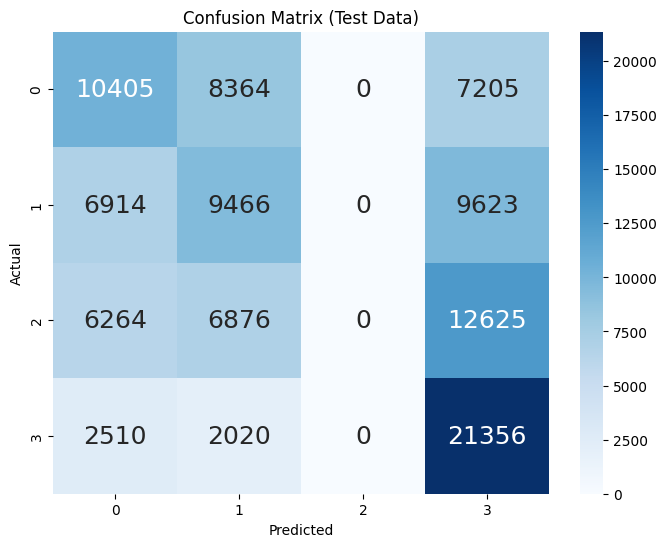

In [76]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cm_Test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [77]:
TP = np.diag(cm_Test)
FP = np.sum(cm_Test, axis=0) - TP
FN = np.sum(cm_Test, axis=1) - TP
TN = np.sum(np.sum(cm_Test)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.38876755070202806, TNR: 0.7977741306800697, FPR: 0.20222586931993025, FNR: 0.6112324492979719
Class 1:
TPR: 0.360445071305438, TNR: 0.7714446663593998, FPR: 0.22855533364060018, FNR: 0.639554928694562
Class 2:
TPR: 0.0, TNR: 1.0, FPR: 0.0, FNR: 1.0
Class 3:
TPR: 0.8234841489689135, TNR: 0.6208655332302937, FPR: 0.37913446676970636, FNR: 0.1765158510310865


# Upsampled data is looking better already!

From the upsampled dataset, we can see that most of the values in the classes are more spread out rather than the original datatset. However, it seems that the machine didn't read any values of the 2nd class (Hypertension Stage 1) as result of the upsampled data. This could mean that Class 0, 1 and 3 (Normal, Elevated, and Hypertension Stage 2 respectively) would get predicted more judging by factors of lifestyle in people's day to day life.

In the test dataset, Class 0 and 1 (Normal and Elevated) both have a similair True Positive Rate of 39% and 36% respectively. This means that the model is becoming much more of an accurate model to predict both of these classes. Class 3 has a significantly high True Positive Rate of 82% which means that this is a highly accurate model to predict Hypertension Stage 2. The True Negative rates of the 3 classes also dropped and looked to be similair with each other, 80% in Class 0 (Normal Heart Rate), 77% (Elevated), and 62% (Hypertension Stage 2) which seems like it would predict much better than the original dataset we used. The FPR in Class 0, 1, and 3 (20%, 23%, and 38% respectively) looks to increase fairly high for these datasets than the original dataset which means that the upsampled dataset looks to distribute the data well. Overall, it looks like the upsampled dataset tend to predict better on Class 3 (Hypertension Stage 2) but could also predict Class 0 and 1 (Normal and Elevated) fairly.

Although it seems the values have been more spreadout and gives off a better representation and accuracy, it would still be bad for the machine to just have a 100% True Negative Rate and 0% True Positive Rate on the 2nd class as it just would not read any diagnose of Hypertension Stage 2. The classification accuracy or goodness of fit of both models also seemed to be a bit low,  0.39783649206778093 - 40% (Train dataset) and 0.3915006947660954 - 39% (Test Dataset), but this is due to the amount of spread out data it has between the 3 classed rather than the original one which focused only on the 2nd class.

To find a more accurate model, We will be using Random Forest Classfier to help us give a much better representation as it would combine multiple decision trees to give a more accurate model to train.

# Random Forest in Upsampled Data


In [78]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.bp_category.ravel())

RandomForestClassifier(max_depth=4, n_estimators=200)

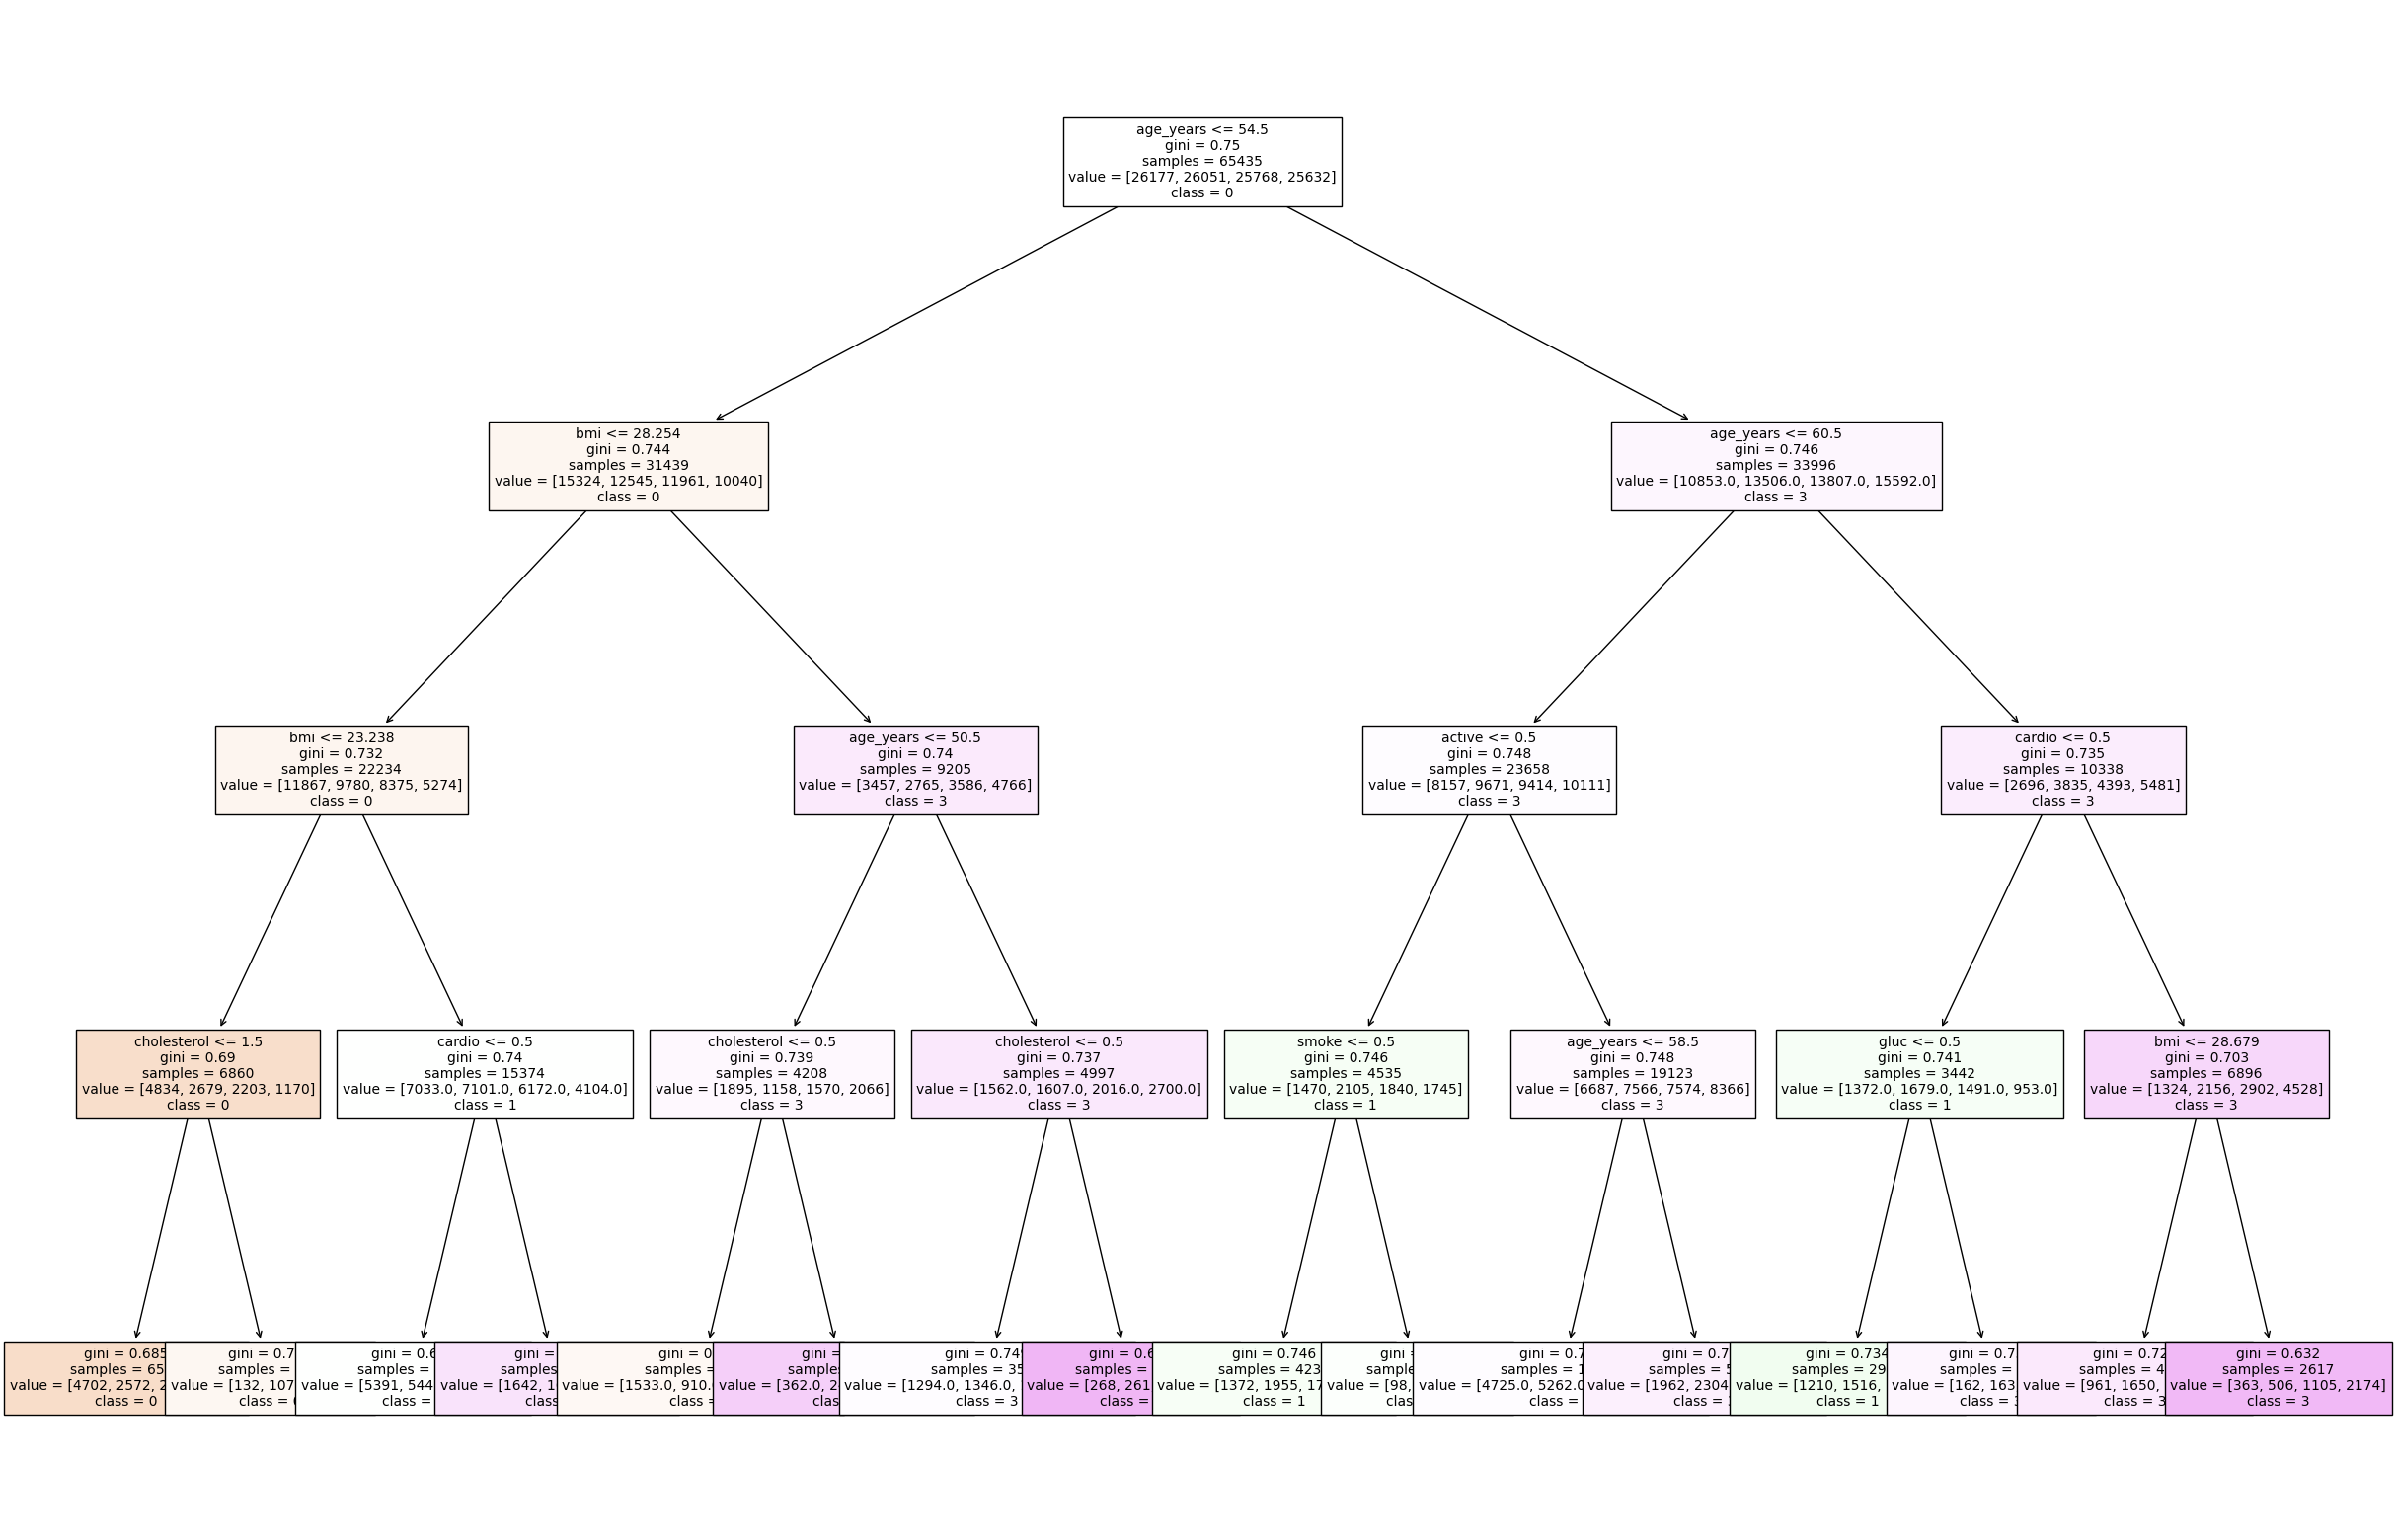

In [79]:
#Printing out the 1st decision tree in the forest
tree = rforest.estimators_[0]
plt.figure(figsize=(30,20))
plot_tree(tree, feature_names=X_train.columns, class_names=['0', '1', '2', '3'], filled=True, fontsize=10)
plt.show()

In [80]:
y_train_pred = rforest.predict(X_train)
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()


Train Data
Accuracy  :	 0.40397382946693944



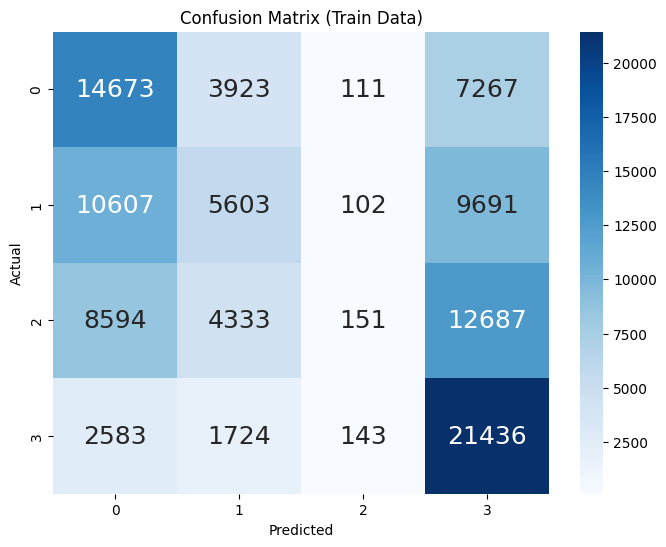

In [81]:
cm_Train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

In [82]:
TP = np.diag(cm_Train)
FP = np.sum(cm_Train, axis=0) - TP
FN = np.sum(cm_Train, axis=1) - TP
TN = np.sum(np.sum(cm_Train)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.5649110649110649, TNR: 0.7194735622118629, FPR: 0.28052643778813713, FNR: 0.4350889350889351
Class 1:
TPR: 0.21547513748413644, TNR: 0.8714331723027375, FPR: 0.1285668276972625, FNR: 0.7845248625158635
Class 2:
TPR: 0.005860663691053755, TNR: 0.9954278668944171, FPR: 0.004572133105582883, FNR: 0.9941393363089462
Class 3:
TPR: 0.828092405161091, TNR: 0.6186745903115433, FPR: 0.3813254096884567, FNR: 0.17190759483890905


In [83]:
y_test_pred = rforest.predict(X_test)
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

Test Data
Accuracy  :	 0.4009572332870156



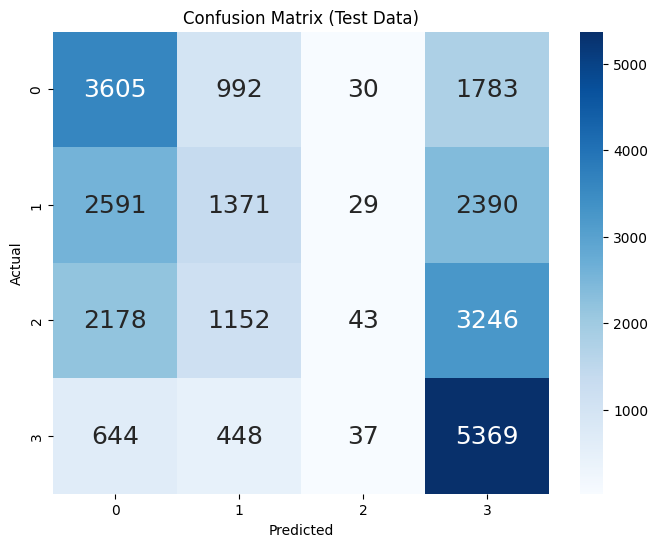

In [84]:
cm_Test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Test, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [85]:
TP = np.diag(cm_Test)
FP = np.sum(cm_Test, axis=0) - TP
FN = np.sum(cm_Test, axis=1) - TP
TN = np.sum(np.sum(cm_Test)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.5624024960998439, TNR: 0.7223817827469484, FPR: 0.2776182172530516, FNR: 0.437597503900156
Class 1:
TPR: 0.2148566055477198, TNR: 0.8672607159317868, FPR: 0.13273928406821325, FNR: 0.7851433944522802
Class 2:
TPR: 0.0064964496147454295, TNR: 0.9950230701436051, FPR: 0.004976929856394837, FNR: 0.9935035503852546
Class 3:
TPR: 0.8262542320714066, TNR: 0.617774343122102, FPR: 0.382225656877898, FNR: 0.17374576792859342


# Random Forest Increased the Classification Accuracy by some margin!
Based on the given train and test Data, it seems as the goodness of fit of the Train and Test models were increased slightly, (Train Accuracy = 0.40397382946693944 - 40%, Test Accuracy = 0.4009572332870156 - 40%). This increase may be significantly low but 2nd class is starting to show some value with the False Negative Rate decreasing from 100% to 99% in both Train and Test Dataset as values of the 2nd class are getting shown in the matrix. True Positive Rate also increased slightly from 0% to 0.7% in both Train and Test Dataset respectively which is not that great but is still an increase.

As for other classes, In the test dataset, Class 0 (Normal Heart Rate) seemed to have improved accuracy, with the True Positive Rate increasing from around 39% to 56%. False Positive Rate also seemed to increase from around 20% to 28% which means that it has a higher chance of misdiagnosing patients. Class 3 (Hypertension Stage 2) seems to stay the same for both the True Positive rate and False Positive rate. However, Class 1 (Elevated Heart Rate) seemed to decrease for the True Positive Rate, going from 36% down to 21%. However, False Positive rates also decreased going from 22% to 13%. From the overall data, This model seems to be improving but it is still not quite good as the prediction and the true positive rates and false positive rates can still be improved. To do this, we can tune the parameters of the model to make it predict much more accurate.

# Hypertuning Random Forest Model with Grid Search in Upsampled Data

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees in the forest
    'max_depth': np.arange(2,11)}  # Maximum depth of the trees

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=5)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 3, scoring='accuracy', verbose=2, n_jobs=-1)


In [102]:
# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train.bp_category.ravel())

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 1000}
Best Score: 0.47043270251215213


In [103]:
X = pd.DataFrame(df_up.drop('bp_category', axis = 1))
y = pd.DataFrame(df_up['bp_category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

rforest = RandomForestClassifier(n_estimators = 1000,
                                 max_depth = 10)
rforest.fit(X_train, y_train.bp_category.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [104]:
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

Train Data
Accuracy  :	 0.4891149110279075



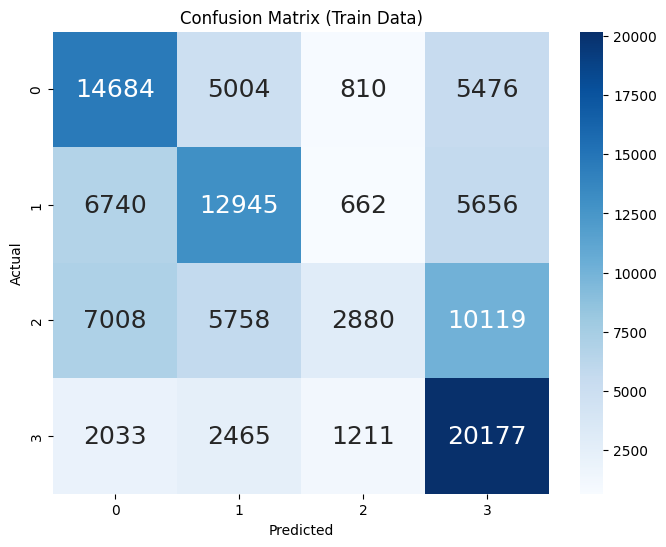

In [105]:
cm_Train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

In [106]:
TP = np.diag(cm_Train)
FP = np.sum(cm_Train, axis=0) - TP
FN = np.sum(cm_Train, axis=1) - TP
TN = np.sum(np.sum(cm_Train)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.5653345653345654, TNR: 0.7967780152986323, FPR: 0.2032219847013676, FNR: 0.43466543466543467
Class 1:
TPR: 0.4978271737876399, TNR: 0.8296038647342995, FPR: 0.1703961352657005, FNR: 0.5021728262123601
Class 2:
TPR: 0.1117795458955948, TNR: 0.9655420417913515, FPR: 0.034457958208648526, FNR: 0.8882204541044052
Class 3:
TPR: 0.7794560766437456, TNR: 0.7266471148156723, FPR: 0.27335288518432765, FNR: 0.22054392335625433


In [107]:
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

Test Data
Accuracy  :	 0.4738690751891308



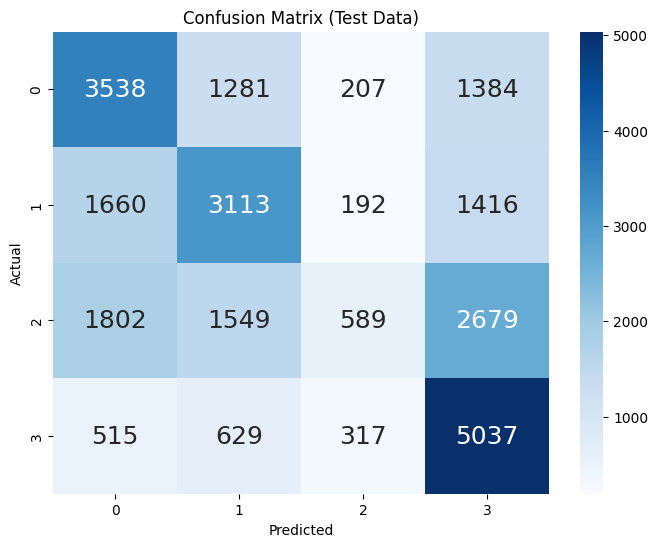

In [108]:
cm_Test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Test, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [109]:
TP = np.diag(cm_Test)
FP = np.sum(cm_Test, axis=0) - TP
FN = np.sum(cm_Test, axis=1) - TP
TN = np.sum(np.sum(cm_Test)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.5519500780031201, TNR: 0.7960303620884194, FPR: 0.20396963791158068, FNR: 0.4480499219968799
Class 1:
TPR: 0.4878545682494907, TNR: 0.8228606544784145, FPR: 0.1771393455215855, FNR: 0.5121454317505093
Class 2:
TPR: 0.08898625169965252, TNR: 0.9628803981543885, FPR: 0.037119601845611486, FNR: 0.9110137483003475
Class 3:
TPR: 0.7751615881809788, TNR: 0.7177228232869655, FPR: 0.28227717671303454, FNR: 0.22483841181902123


# Goodness of fit model of the hypertuned parameter model looks to increase by a huge margin!
Based on the given train and test Data of the hypertuned model of the random forest model, it seems as the goodness of fit of the Train and Test models increased significantly, (Train Accuracy = 0.4891149110279075 - 49%, Test Accuracy = 0.4738690751891308 - 47%). This increase is very drastic and signifcant as the upsampled dataset looks to be much more of an accurate finding to predicting cardiovascular health. The 2nd class (Hypertension 1) is starting to show more value with the False Negative Rate decreasing from 99% to 88% and 91% in both Train and Test Dataset respectively. True Positive Rates also increased slightly from 5% to 11% and 9% in both Train and Test Dataset respectively which is still not as great as we would hope to be, but the hypertuned model helped us find the best values to work with in the upsampled dataset itself.

As for other classes, In the test dataset, Class 0 (Normal Heart Rate) seemed to have the same values from the random forest model without hypertuning, with the True Positive Rate only decreasing from 56% to 55%. False Positive Rate seemed to also decreased significantly, going from 27% to 20%, which is very good. Class 3 (Hypertension Stage 2)'s True positive rate seemed to decrease by around 5% (83%-78%) which is not as bad of a decrease. Its False Positive rate also decreased significantly by around 10% (38%-28%) which is a significant jump after hypertuning it. Class 1 (Elevated Heart Rate) seemed to increase signifacntly for the True Positive Rate, going from 21% up to 49%. False positive rate seemed to only increase slightly by 4% (13%-17%). From the overall data, This model seems to be have a better distribution of data towards every single class which makes the random forest model have more of an accurate understanding of the sample itself to work with and helped increase the goodness of fit model by a fair margin. 

# Downsampled Data


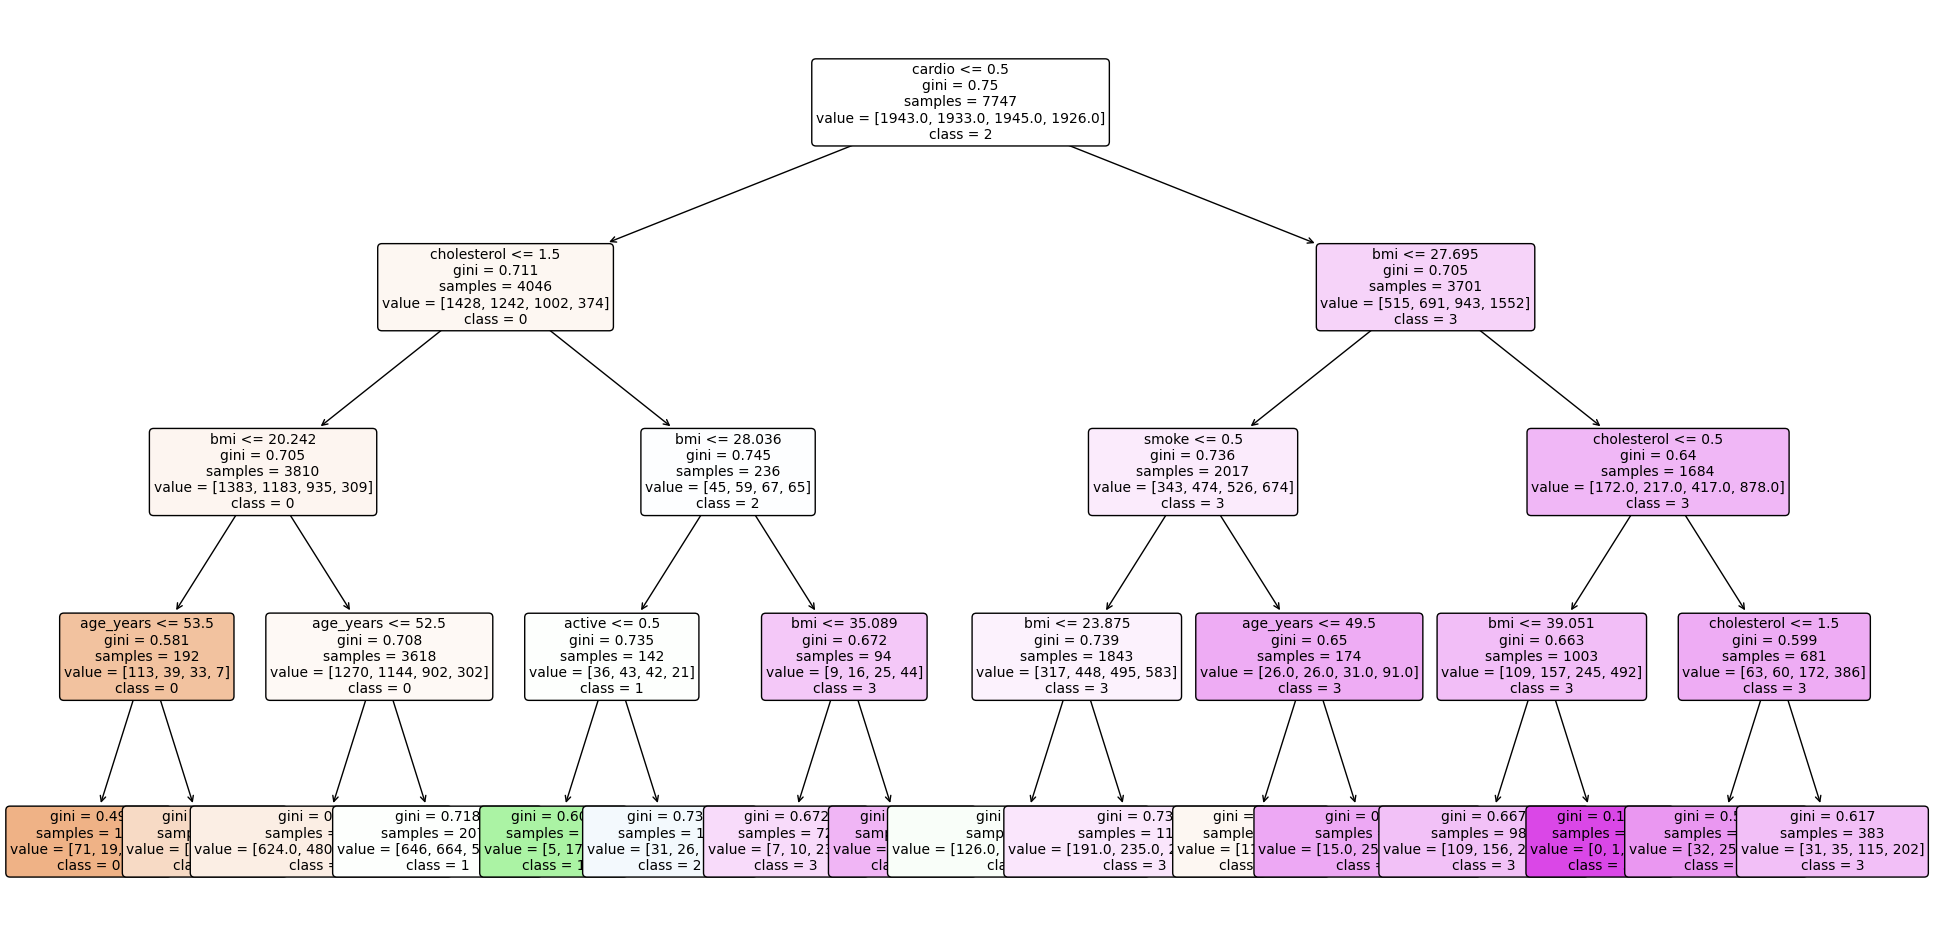

In [138]:
y = pd.DataFrame(df_down['bp_category'])
X = pd.DataFrame(df_down.drop('bp_category', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=X_train.columns,
          class_names=["0", "1", "2", "3"], fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

Train Data
Accuracy  :	 0.3978314186136569



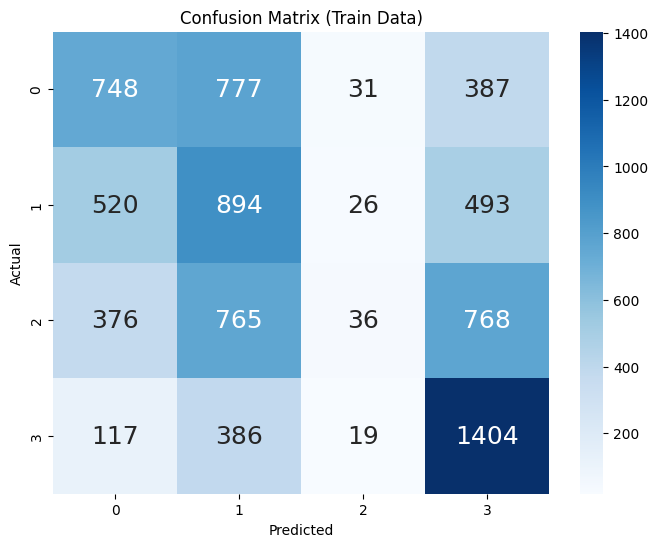

In [139]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cm_Train1 = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train1, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

In [140]:
TP = np.diag(cm_Train1)
FP = np.sum(cm_Train1, axis=0) - TP
FN = np.sum(cm_Train1, axis=1) - TP
TN = np.sum(np.sum(cm_Train1)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.3849716932578487, TNR: 0.8254651964162646, FPR: 0.17453480358373535, FNR: 0.6150283067421514
Class 1:
TPR: 0.46249353336782206, TNR: 0.6683866529067768, FPR: 0.33161334709322327, FNR: 0.5375064666321779
Class 2:
TPR: 0.018508997429305913, TNR: 0.9869010685970355, FPR: 0.013098931402964495, FNR: 0.9814910025706941
Class 3:
TPR: 0.7289719626168224, TNR: 0.7168871327950525, FPR: 0.2831128672049476, FNR: 0.27102803738317754


Test Data
Accuracy  :	 0.4088797108931337



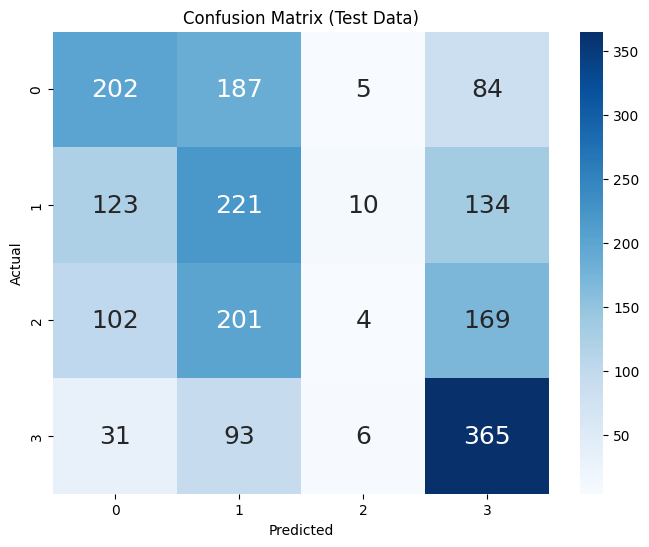

In [141]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cm_Test1 = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Test1, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [142]:
TP = np.diag(cm_Test1)
FP = np.sum(cm_Test1, axis=0) - TP
FN = np.sum(cm_Test1, axis=1) - TP
TN = np.sum(np.sum(cm_Test1)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.4225941422594142, TNR: 0.8245373543522961, FPR: 0.17546264564770392, FNR: 0.5774058577405857
Class 1:
TPR: 0.45286885245901637, TNR: 0.6680469289164941, FPR: 0.33195307108350586, FNR: 0.5471311475409836
Class 2:
TPR: 0.008403361344537815, TNR: 0.9856262833675564, FPR: 0.014373716632443531, FNR: 0.9915966386554622
Class 3:
TPR: 0.7373737373737373, TNR: 0.731622746185853, FPR: 0.268377253814147, FNR: 0.26262626262626265


# Downsampled data is looking better already!
From the downsampled dataset, we can see that most of the values in the classes are more spread out rather than the original datatset. The distribution of the data seemed to be equal, except for class 2 (Hypertension Stage 1). This could mean that Class 0, 1 and 3 (Normal, Elevated, and Hypertension Stage 2 respectively) would get predicted more judging by factors of lifestyle in people's day to day life.

In the test dataset, Class 0 and 1 (Normal and Elevated) both have a similair True Positive Rate of 42% and 45% respectively. This means that the model is becoming much more of an accurate model to predict both of these classes. Class 3 has a significantly high True Positive Rate of 73% which means that this is a highly accurate model to predict Hypertension Stage 2. The True Negative rates of the 3 classes also increased from the original dataset, 82% in Class 0 (Normal Heart Rate), 66% (Elevated), and 73% (Hypertension Stage 2) which seems like it would predict significantly better than the original dataset we used. The FPR in Class 0, 1, and 3 (18%, 33%, and 27% respectively) looks to increase compared to the original dataset which means that the downsampled dataset is a much more accurate way to predict their health. Overall, it looks like the Downsampled dataset tend to predict better on Class 3 (Hypertension Stage 2) but could also predict Class 0 and 1 (Normal and Elevated) reasonably well.

Although it seems the values have been more spreadout and gives off a better representation and accuracy, it would still be bad for the machine to just have a 99% False Negative Rate and 0.8% True Positive Rate on the 2nd class as it can cause misdiagnosis as in the original dataset. The classification accuracy or goodness of fit of both models also seemed to drop a little, 0.3978314186136569 - 40% (Train dataset) and 0.4088797108931337 - 41% (Test Dataset), but this is due to the amount of spread out data it has rather than the original one which focused only on the 2nd class.

To find a better accurate model, We will be using Random Forest Classfier to help us give a much better representation as it would combine multiple decision trees to give a more accurate model to train.

# Random Forest on Downsampled Data

In [143]:
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.bp_category.ravel())

RandomForestClassifier(max_depth=4, n_estimators=200)

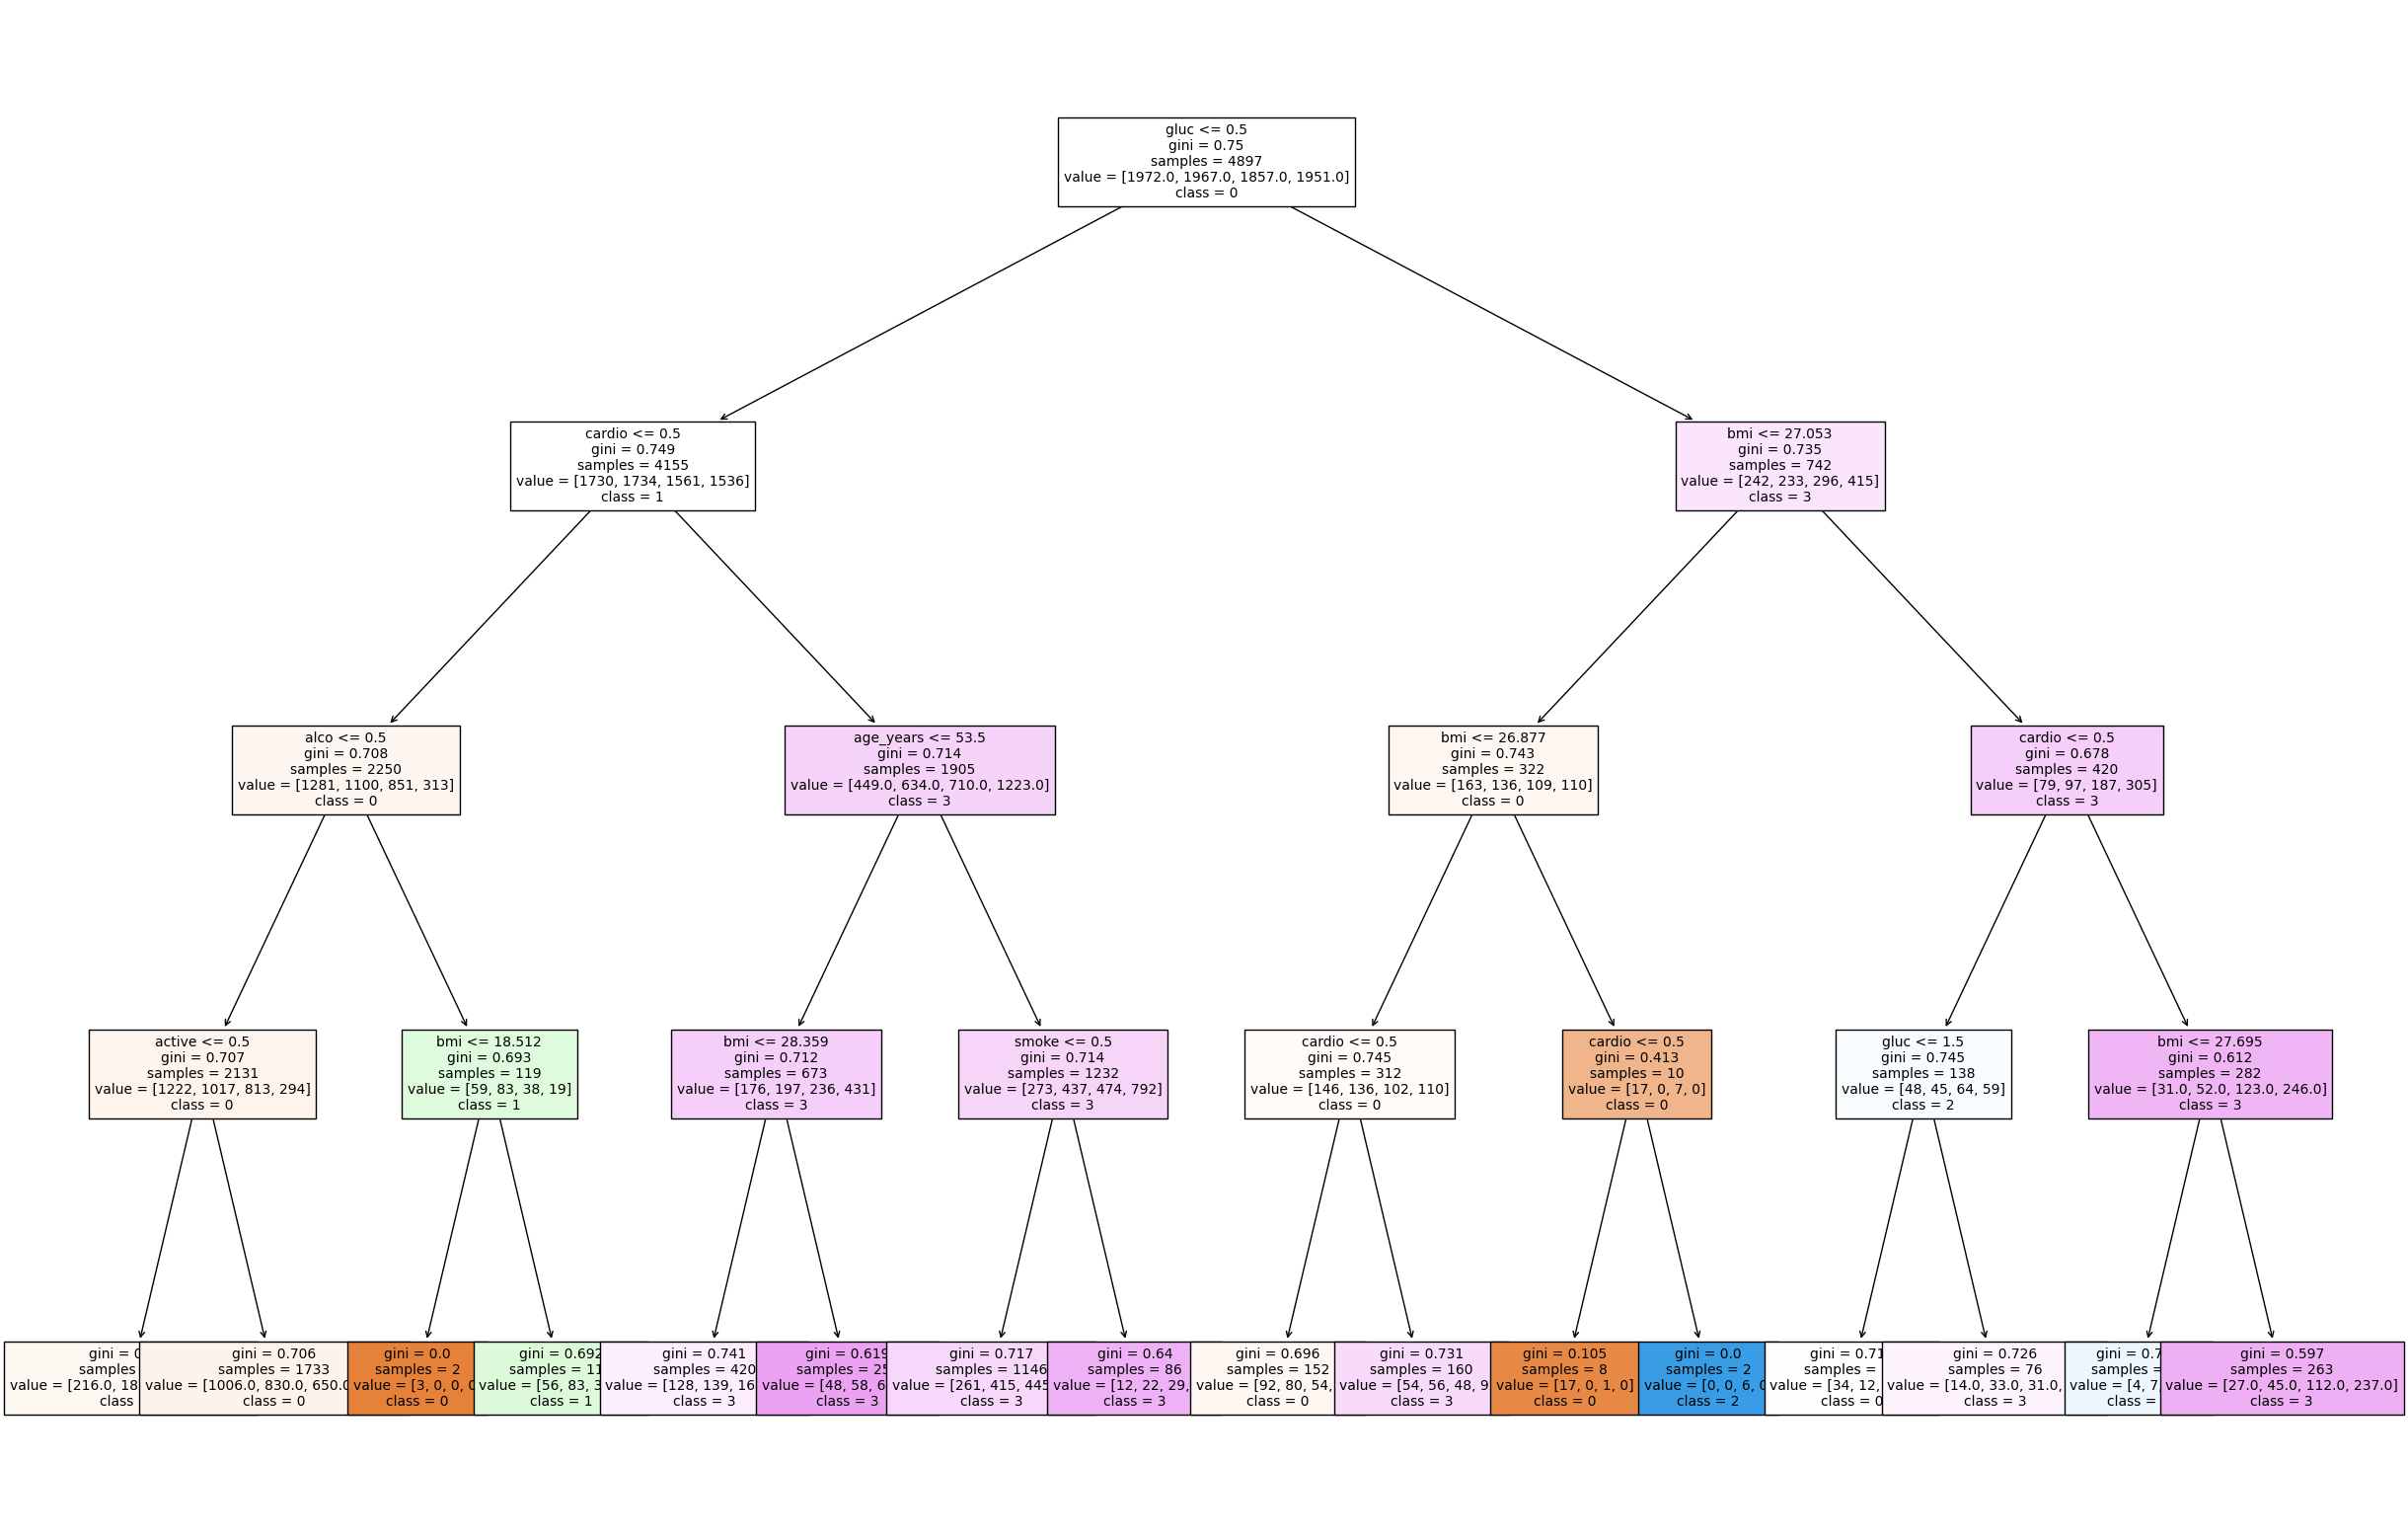

In [144]:
tree = rforest.estimators_[0]
plt.figure(figsize=(30,20))
plot_tree(tree, feature_names=X_train.columns, class_names=['0', '1', '2', '3'], filled=True, fontsize=10)
plt.show()

In [145]:
y_train_pred = rforest.predict(X_train)
print("Train Data on Downsampled Data using Random Forest Model")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

Train Data on Downsampled Data using Random Forest Model
Accuracy  :	 0.41112688782754614



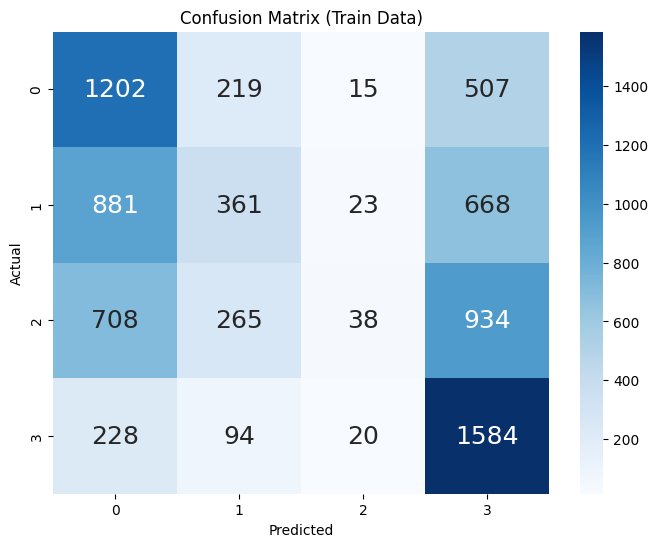

In [146]:
cm_Train1 = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train1, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

In [147]:
TP = np.diag(cm_Train1)
FP = np.sum(cm_Train1, axis=0) - TP
FN = np.sum(cm_Train1, axis=1) - TP
TN = np.sum(np.sum(cm_Train1)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.6186309830159548, TNR: 0.6869400413507926, FPR: 0.31305995864920744, FNR: 0.3813690169840453
Class 1:
TPR: 0.1867563372995344, TNR: 0.9005847953216374, FPR: 0.09941520467836257, FNR: 0.8132436627004656
Class 2:
TPR: 0.01953727506426735, TNR: 0.9900034470872113, FPR: 0.009996552912788694, FNR: 0.9804627249357326
Class 3:
TPR: 0.822429906542056, TNR: 0.6376911183645422, FPR: 0.3623088816354578, FNR: 0.17757009345794392


In [148]:
y_test_pred = rforest.predict(X_test)
print("Test Data on Downsampled Data using Random Forest Model")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

Test Data on Downsampled Data using Random Forest Model
Accuracy  :	 0.4161073825503356



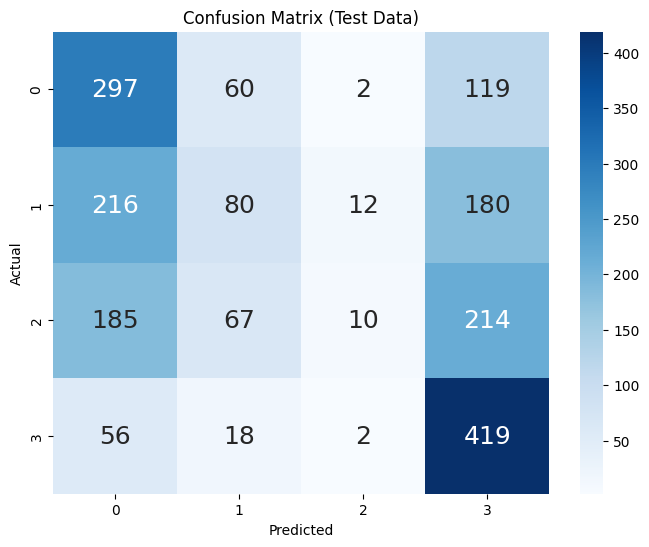

In [149]:
cm_Test1 = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Test1, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [150]:
TP = np.diag(cm_Test1)
FP = np.sum(cm_Test1, axis=0) - TP
FN = np.sum(cm_Test1, axis=1) - TP
TN = np.sum(np.sum(cm_Test1)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.6213389121338913, TNR: 0.686771761480466, FPR: 0.3132282385195339, FNR: 0.3786610878661088
Class 1:
TPR: 0.16393442622950818, TNR: 0.8999309868875086, FPR: 0.10006901311249138, FNR: 0.8360655737704918
Class 2:
TPR: 0.02100840336134454, TNR: 0.9890485968514716, FPR: 0.010951403148528405, FNR: 0.9789915966386554
Class 3:
TPR: 0.8464646464646465, TNR: 0.644244105409154, FPR: 0.35575589459084606, FNR: 0.15353535353535352


# Random forest model on Downsampled data seemed to increase it slightly
Based on the given train and test Data, it seems as the goodness of fit of the Train and Test models were increased slightly, (Train Accuracy = 0.41112688782754614 - 41%,, Test Accuracy = 0.4161073825503356 - 42%%). This increase may be significantly low but it seemed that Class 0's TPR has improved, going from 43% to 62% (TPR). However, the FPR has increased from 17% to 31% which means more room for error. 

As for other classes, In the test dataset, Class 3 (Hyperternsion Stage 2) seemed also to have improved accuracy, with the True Positive Rate increasing from around 73 - 85%. False Positive Rate also seemed to increasing from around 27%-36%  which signifcantly causes more room for error. Class 1 (Elevated heart rate)'s TPR seemed to signifacantly dropped low, from 45% to 16%. it's FPR seemed to decrease from 33% to 10%, but since the TPR is very low, it still isn't that good of an improvement. However, Class 2 (Hypertension Stage 1)'s True Positive Rate increased, going from 0.8 to 2%. It's False negative rate also decreased going from 99% to 98%. From the overall data, This model seems to be improving but it is still not quite good as the prediction and classification accuracy for all the classes as it can still be improved. To do this, we can tune the parameters of the model to make it predithese values ct much more accurate.

# Hypertuning Random Forest Model with Grid Search in Downsampled Data

In [151]:
# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees in the forest
    'max_depth': np.arange(2,11)}    # Maximum depth of the trees

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=5)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

In [152]:
# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train.bp_category.ravel())

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Best Score: 0.40493118774277265


In [154]:
X = pd.DataFrame(df_down.drop('bp_category', axis = 1))
y = pd.DataFrame(df_down['bp_category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

rforest = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 7)
rforest.fit(X_train, y_train.bp_category.ravel())

RandomForestClassifier(max_depth=7)

In [155]:
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data on Downsampled Data using Random Forest Model")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

Train Data on Downsampled Data using Random Forest Model
Accuracy  :	 0.45230411772298956



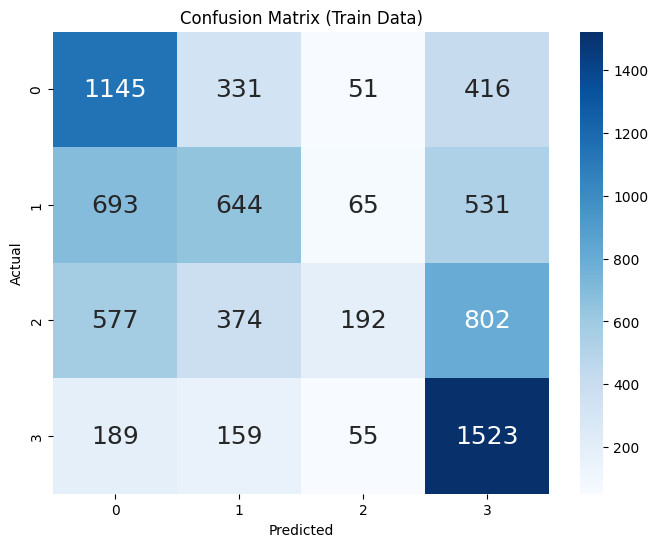

In [156]:
cm_Train1 = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Train1, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

In [157]:
TP = np.diag(cm_Train1)
FP = np.sum(cm_Train1, axis=0) - TP
FN = np.sum(cm_Train1, axis=1) - TP
TN = np.sum(np.sum(cm_Train1)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.5892949047864128, TNR: 0.7486216402481047, FPR: 0.25137835975189526, FNR: 0.4107050952135872
Class 1:
TPR: 0.3331608898085877, TNR: 0.8513931888544891, FPR: 0.14860681114551083, FNR: 0.6668391101914123
Class 2:
TPR: 0.09871465295629821, TNR: 0.9705274043433298, FPR: 0.029472595656670115, FNR: 0.9012853470437018
Class 3:
TPR: 0.7907580477673936, TNR: 0.6995361621714482, FPR: 0.3004638378285518, FNR: 0.20924195223260644


In [161]:
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data on Downsampled Data using Random Forest Model")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

Test Data on Downsampled Data using Random Forest Model
Accuracy  :	 0.42488384099122356



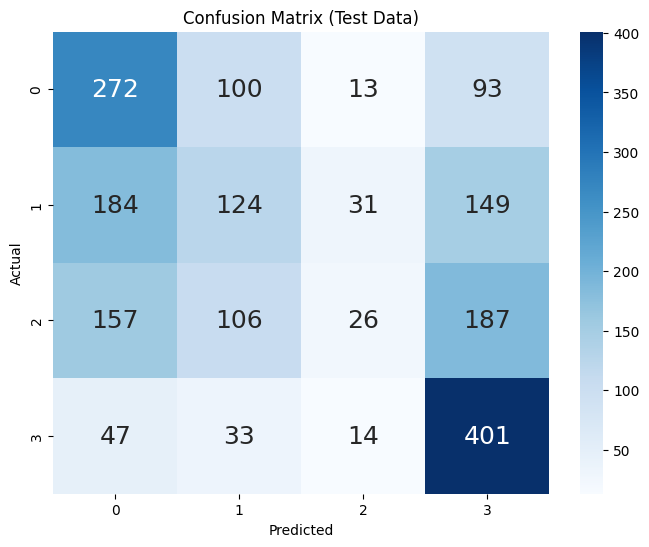

In [162]:
cm_Test1 = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_Test1, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [160]:
TP = np.diag(cm_Test1)
FP = np.sum(cm_Test1, axis=0) - TP
FN = np.sum(cm_Test1, axis=1) - TP
TN = np.sum(np.sum(cm_Test1)) - (TP + FP + FN)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print TPR, TNR, FPR, FNR for each class
for i in range(len(TPR)):
    print(f"Class {i}:")
    print(f"TPR: {TPR[i]}, TNR: {TNR[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")

Class 0:
TPR: 0.5690376569037657, TNR: 0.7340644276901988, FPR: 0.26593557230980125, FNR: 0.4309623430962343
Class 1:
TPR: 0.2540983606557377, TNR: 0.8350586611456177, FPR: 0.16494133885438234, FNR: 0.7459016393442623
Class 2:
TPR: 0.0546218487394958, TNR: 0.9603011635865846, FPR: 0.03969883641341547, FNR: 0.9453781512605042
Class 3:
TPR: 0.8101010101010101, TNR: 0.70249653259362, FPR: 0.29750346740638, FNR: 0.1898989898989899


# With the hypertuned model of Random forest, Downsampled Data's Goodness of fit accuracy also increased!!
Based on the given train and test Data of the hypertuned model of the random forest model, it seems as the goodness of fit of the Train and Test models increased, (Train Accuracy = 0.45230411772298956 - 45%, Test Accuracy =  0.42488384099122356 - 43%). The increase from the non-hypertuned model isn't that significant for the Test dataset but it increased fairly in the train dataset. From analyzing the classification accuracy in the test data, The 2nd class (Hypertension 1) is starting to show more value with the False Negative Rate decreasing from 98% to 90% and 95% in both Train and Test Dataset respectively. True Positive Rates also increased slightly from 2% to 10% and 5% in both Train and Test Dataset respectively which is still not as great as we would hope to be, but the hypertuned model helped us find the best values to work with in the downsampled dataset itself.

As for other classes, In the test dataset, Class 0 (Normal Heart Rate) seemed to have stay the same, with the True Positive Rate decreasing slightly by 5 %, from 62% to 57%. False Positive Rate seemed to also decrease, from 31% to 27%, which is considered good as it mean there will be less room for error. Class 3 (Hypertension Stage 2)'s True positive rate seemed to decrease by around 3% (84%-81%) which is not as bad of a decrease. Its False Positive rate also decreased significantly by around 7% (36%-29%) which is a fair jump after hypertuning it. However, Class 1 (Elevated Heart Rate) seemed to increase signifacntly for the True Positive Rate, going from 16% up to 25%. Inversely, the False positive rate also increased signifantly going from 10 to 16%. From the overall data, This model seems to be have a better distribution of data towards every single class , especially Class 0 and Class 3, which makes the random forest model have more of an accurate understanding of the sample itself to work with and helped increase the goodness of fit model by a fair margin. .

# Identifying which model is the best
Train Data on Upsampled Data using Random Forest Model After Hypertuning

Accuracy: 48.91%

1. Class 0:
- TPR: 56.53%
- TNR: 79.68%
- FPR: 20.32%
- FNR: 43.47%
2. Class 1:
- TPR: 49.78%
- TNR: 82.96%
- FPR: 17.04%
- FNR: 50.22%
3. Class 2:
- TPR: 11.18%
- TNR: 96.55%
- FPR: 3.45%
- FNR: 88.82%
4. Class 3:
- TPR: 77.95%
- TNR: 72.66%
- FPR: 27.34%
- FNR: 22.05%

Test Data on Upsampled Data using Random Forest Model After Hypertuning

Accuracy: 47.39%

1. Class 0:
- TPR: 55.20%
- TNR: 79.60%
- FPR: 20.40%
- FNR: 44.80%
2. Class 1:
- TPR: 48.79%
- TNR: 82.29%
- FPR: 17.71%
- FNR: 51.21%
3. Class 2:
- TPR: 8.90%
- TNR: 96.29%
- FPR: 3.71%
- FNR: 91.10%
4. Class 3:
- TPR: 77.52%
- TNR: 71.77%
- FPR: 28.23%
- FNR: 22.48%

Train Data on Downsampled Data using Random Forest Model After Hypertuning

Accuracy: 45.23%
1. Class 0:
- TPR: 58.93%
- TNR: 74.86%
- FPR: 25.14%
- FNR: 41.07%
2. Class 1:
- TPR: 33.32%
- TNR: 85.14%
- FPR: 14.86%
- FNR: 66.68%
3. Class 2:
- TPR: 9.87%
- TNR: 97.05%
- FPR: 2.95%
- FNR: 90.13%
4. Class 3:
- TPR: 79.08%
- TNR: 69.95%
- FPR: 30.05%
- FNR: 20.92%

Test Data on Downsampled Data usi After Hypertuningng Random Forest M
odel

Accuracy: 42.49%
1. Class 0:
- TPR: 56.90%
- TNR: 73.41%
- FPR: 26.59%
- FNR: 43.10%
2. Class 1:
- TPR: 25.41%
- TNR: 83.51%
- FPR: 16.49%
- FNR: 74.59%
3. Class 2:
- TPR: 5.46%
- TNR: 96.03%
- FPR: 3.97%
- FNR: 94.54%
4. Class 3:
- TPR: 81.01%
- TNR: 70.25%
- FPR: 29.75%
- FNR: 18.99%

Upsampled Data
1. Class 0 (balance between detecting positives and avoiding false positives):
- Train: TPR 56.53%, TNR 79.68%
- Test: TPR 55.20%, TNR 79.60%
2. Class 1:
- Train: TPR 49.78%, TNR 82.96%
- Test: TPR 48.79%, TNR 82.29%
3. Class 2 (significant difficulty in detecting true positives):
- Train: TPR 11.18%, TNR 96.55%
- Test: TPR 8.90%, TNR 96.29%
4. Class 3 (good detection of true positives but higher false positives):
- Train: TPR 77.95%, TNR 72.66%
- Test: TPR 77.52%,#  TNR 71.77%


Downsampled Data

1. Class 0:
- Train: TPR 58.93%, TNR 74.86%
- Test: TPR 56.90%, TNR 73.41%
2. Class 1 (struggles significantly in detecting true positives):
- Train: TPR 33.32%, TNR 85.14%
- Test: TPR 25.41%, TNR 83.51%
3. Class 2 (extremely poor in detecting true positives):
- Train: TPR 9.87%, TNR 97.05%
- Test: TPR 5.46%, TNR 96.03%
4. Class 3:
- Train: TPR 79.08%, TNR 69.95%
- Test: TPR 81.01%, TNR 70.25%

# Based on the metrics: Upsampled Data will be used for predicting Cardiovascular health!

Overall Accuracy:
-  The upsampled model consistently shows a better goodness of fit accuracy and classification accuracy overall than the downsampled model for both training and test set.

Class-Specific Performance:
- The upsampled model generally provides a better balance in detecting true positives and avoiding False Positive Rates. In the upsampled model, Class 1 (Elevated Blood Pressure) does significantly better than downsampled (a difference of around 16% in train and 23% in test) and 2 (difference of 2% in train and 4% in test). For class 0 and 3, the difference between the upsampled and downsampled dataset doesnt even come to >2% which means that there is really no significance difference between the upsampled and downsampled. Overall, the upsampled model provides more significant differnece if we use it rather than the downsampled one.

- As for the False positive rates, it can be seen that both upsampled and downsampled datasets has very similair results which means that using upsampled would still be the better alternative to use to predict cardiovascular health.

Thus, the upsampled data using the Random Forest model after hyperparameter tuning is the better overall predictor compared to the downsampled counterpart. This is primarily due to better accuracy and more balanced performance across the classes, particularly in handling the minority classes without overly sacrificing performance in other areas.